In [31]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import warnings
import seaborn as sns
import sklearn
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from patsy import dmatrices

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [4]:
Data = sm.datasets.fair.load_pandas().data
Data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
Data['affair'] = (Data.affairs>0).astype(int)
Data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [10]:
Data.describe


<bound method NDFrame.describe of       rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0               3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1               3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2               4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3               4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4               5.0  27.0          9.0       1.0        1.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2

# Exploratory Data Analysis

It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

<AxesSubplot:>

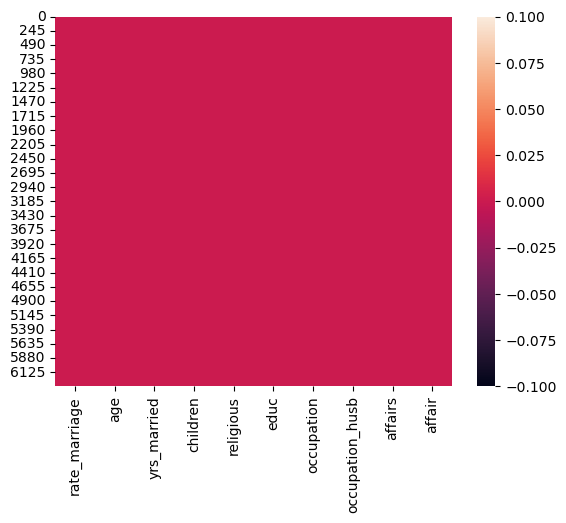

In [11]:
# Checking for the null values
sns.heatmap(dta.isnull())


<AxesSubplot:xlabel='affair', ylabel='educ'>

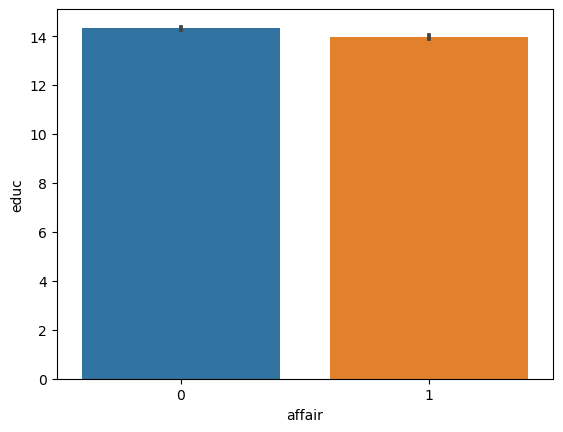

In [19]:
sns.barplot(x='affair',y='educ',data=dta)


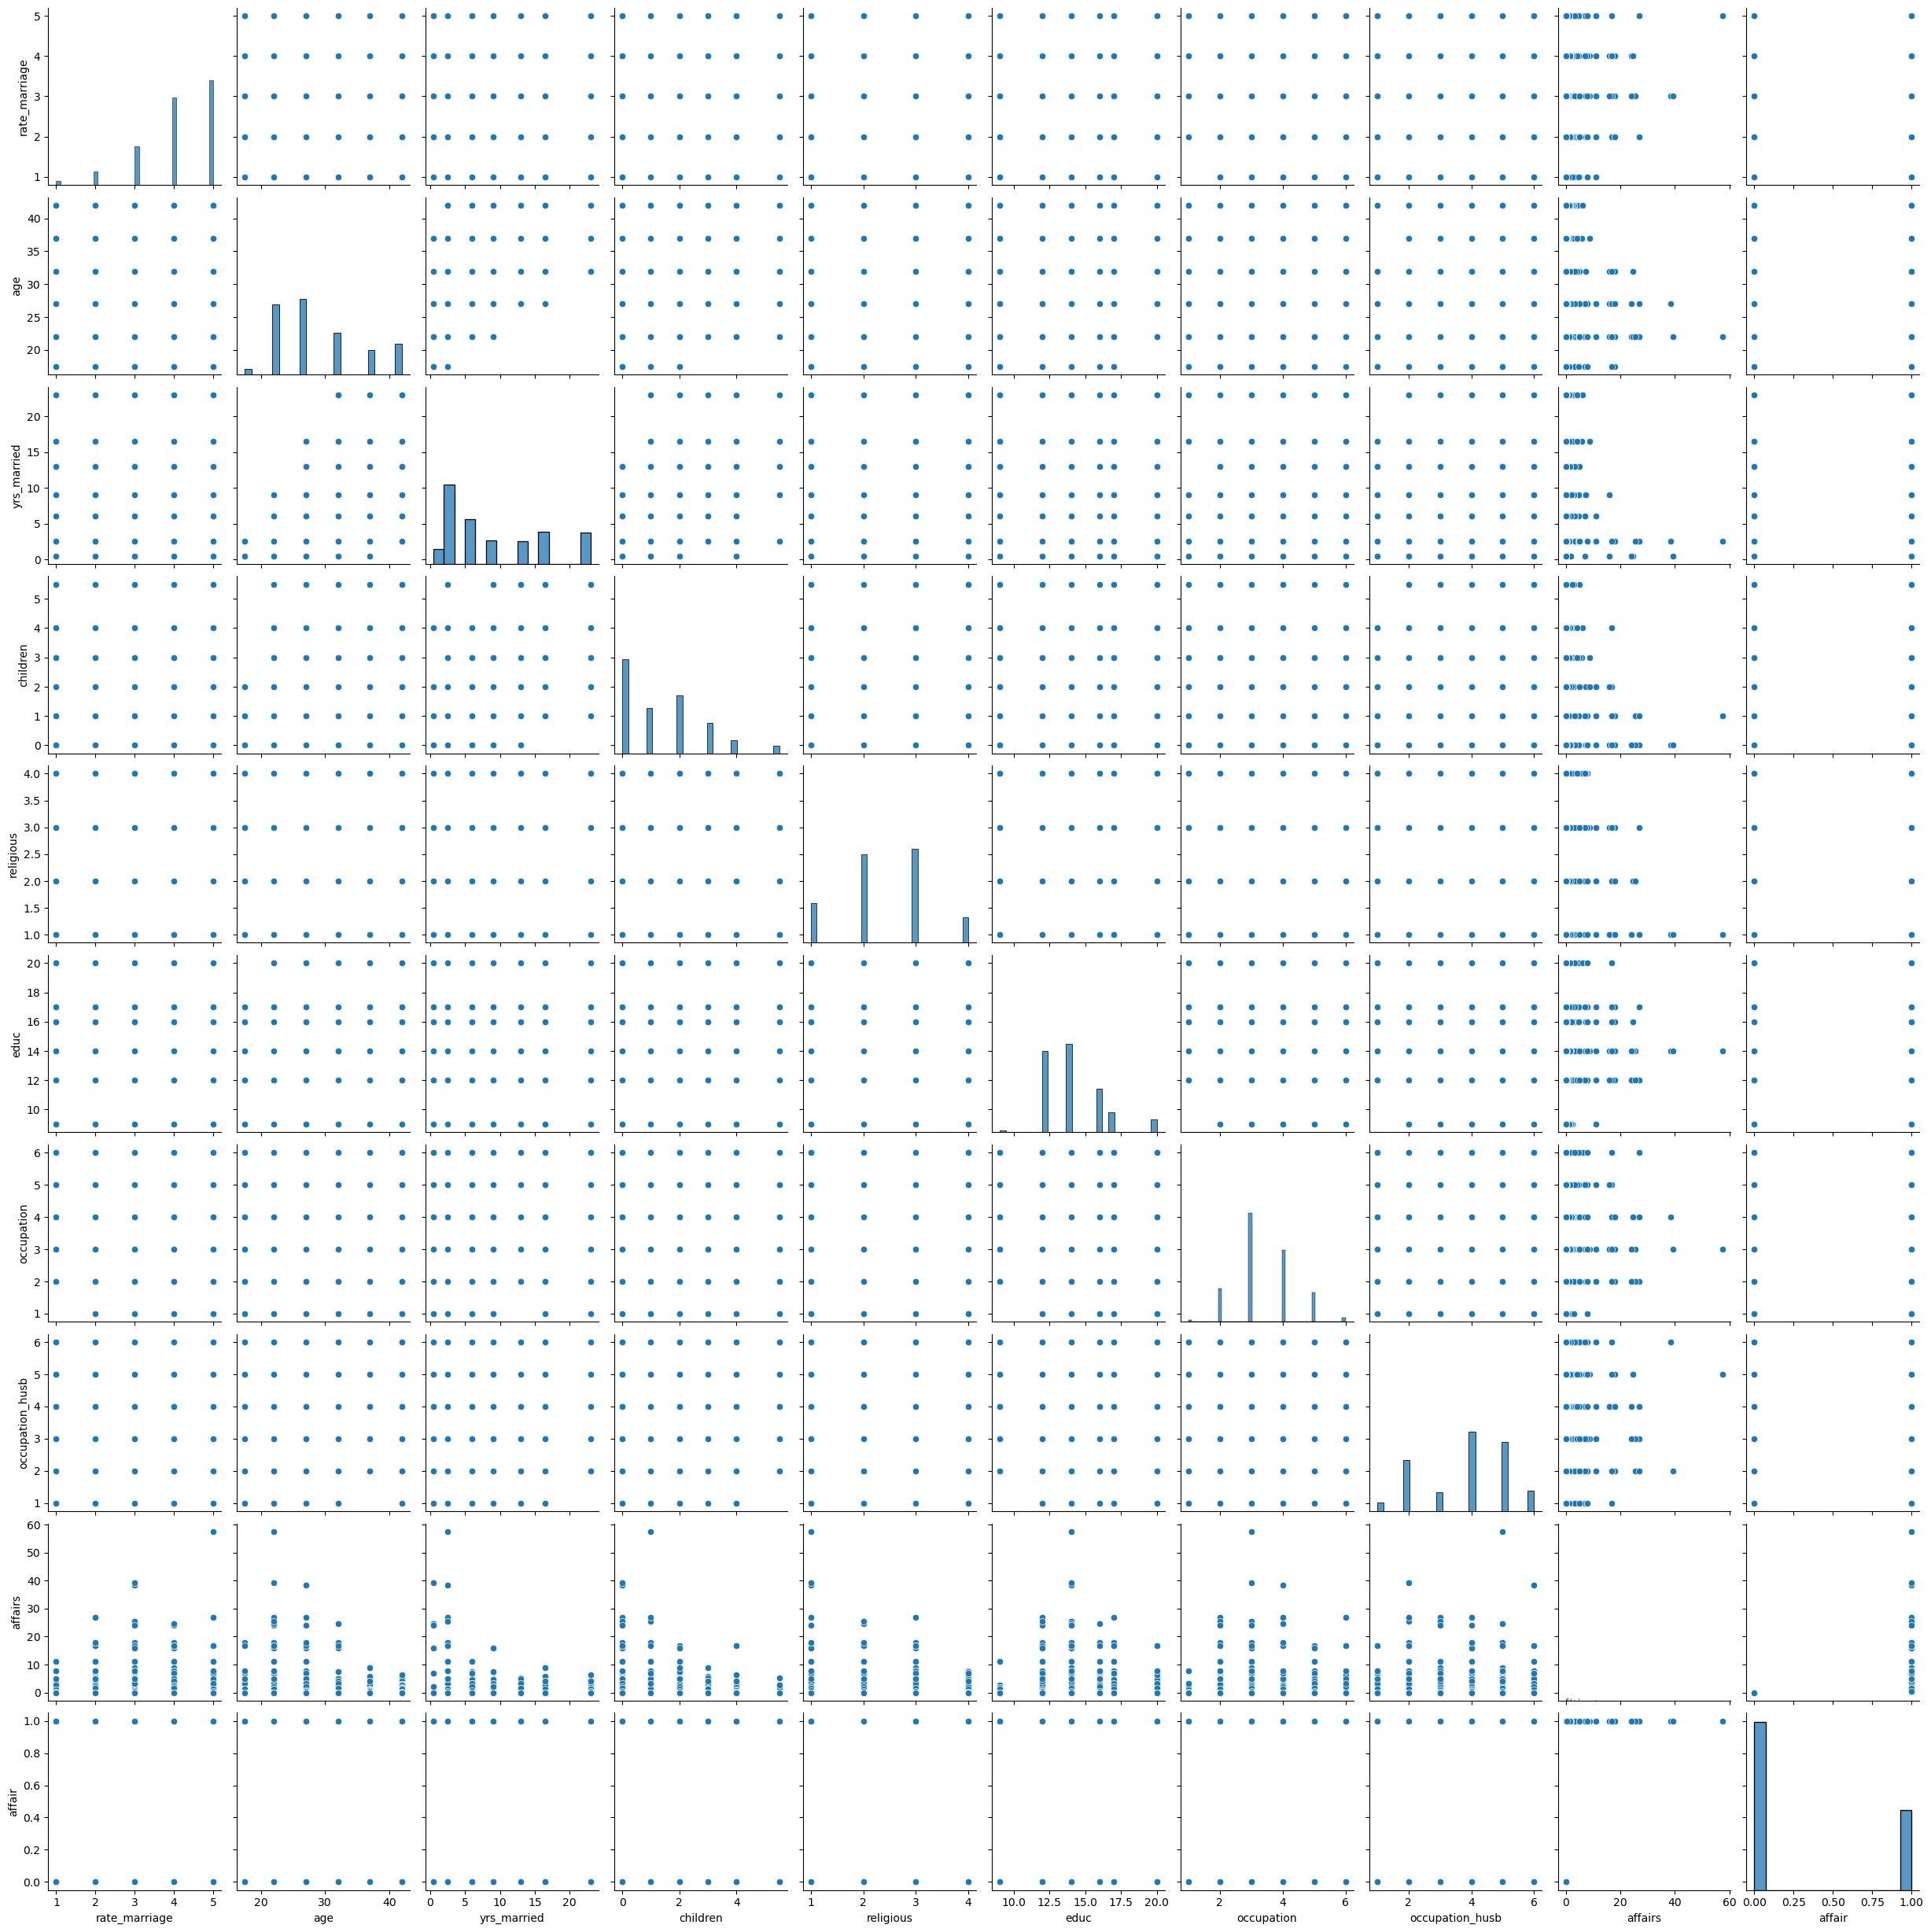

In [20]:
sns.pairplot(Data)

Text(0, 0.5, 'Frequency')

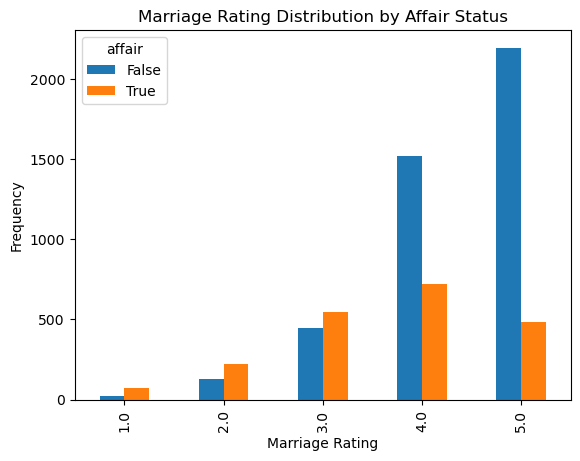

In [21]:
# barplot of marriage rating grouped by affair Boolean: True or False
pd.crosstab(Data.rate_marriage, Data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

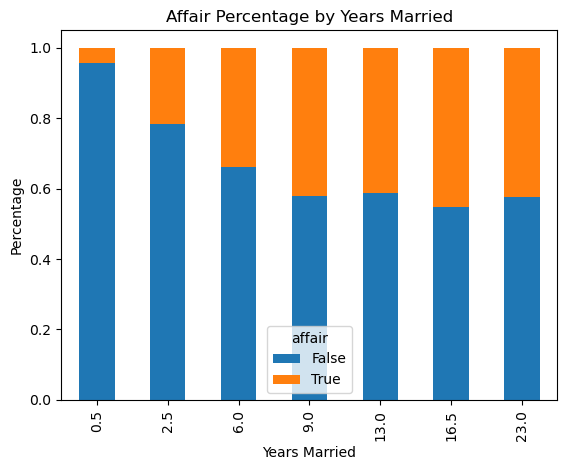

In [23]:
Years_married = pd.crosstab(Data.yrs_married, Data.affair.astype(bool))
Years_married.div(Years_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

# Data Mining

In [24]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', Data, return_type="dataframe")


In [25]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [26]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [27]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [36]:
Y = np.ravel(y)
Y

array([1., 1., 1., ..., 0., 0., 0.])

# Applying Logistical Regression

In [37]:

log_reg1 = LogisticRegression()

In [38]:
log_reg1.fit(X,Y)

LogisticRegression()

In [39]:
log_reg1.score(X,Y)

0.7251021049324536

In [40]:
Y.mean()

0.3224945020420987

In [41]:
X.columns, np.transpose(log_reg1.coef_)


(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.42889624],
        [ 0.10831684],
        [ 0.39755228],
        [ 0.10407848],
        [ 0.71626306],
        [ 0.31138349],
        [ 0.28538921],
        [ 0.41202483],
        [ 0.24570744],
        [ 0.278862  ],
        [ 0.31575638],
        [-0.69982169],
        [-0.05711381],
        [ 0.10596532],
        [ 0.00795621],
        [-0.38878721],
        [ 0.01230878]]))

# Performing Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100, test_size=0.3)

In [43]:
X_train.shape

(4456, 17)

In [44]:
X_test.shape

(1910, 17)

In [45]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train,y_train)

LogisticRegression()

In [50]:
Predict = log_reg2.predict(X_test)


In [51]:
Predict

array([0., 0., 0., ..., 1., 0., 0.])

In [52]:
Probs = log_reg2.predict_proba(X_test)
Probs

array([[0.91983352, 0.08016648],
       [0.8001627 , 0.1998373 ],
       [0.68393766, 0.31606234],
       ...,
       [0.3245253 , 0.6754747 ],
       [0.68639861, 0.31360139],
       [0.63758351, 0.36241649]])

# Evaluating the Model

In [53]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix


In [54]:
print(f'Classification report : {classification_report(y_test,prediction)}')


Classification report :               precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1286
         1.0       0.62      0.31      0.42       624

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.70      0.71      0.68      1910



In [55]:
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')


Accuracy Score : 0.7136125654450262


In [56]:
print(f'Roc_Auc_Score : {roc_auc_score(y_test,prediction)}')


Roc_Auc_Score : 0.6107837859393069


In [57]:
print(f'Confusion Matrix : {confusion_matrix(y_test,prediction)}')


Confusion Matrix : [[1167  119]
 [ 428  196]]


In [58]:
from sklearn.model_selection import cross_val_score
CVScores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)


In [59]:
CVScores

array([0.71899529, 0.69858713, 0.73940345, 0.70800628, 0.71271586,
       0.7299843 , 0.72798742, 0.70440252, 0.75      , 0.75157233])

In [60]:
CVScores.mean()

0.7241654571843251